## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.482801 -0.409676  1.100843  0.048269  1.030037  0.198900
1 -1.330686 -0.804980 -1.380458  1.747643 -1.140361  0.136924
2 -0.220076 -1.533074  0.070272  1.653896 -0.663390 -0.391031
3  0.086047 -0.334330 -0.788221  0.271937 -0.728457  0.042956
4 -1.432758 -0.807878  0.623439 -0.782203 -1.535640 -1.975782


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9859773	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9768464	total: 70ms	remaining: 34.9s
2:	learn: 0.9658341	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9546057	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9436980	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9331124	total: 73.3ms	remaining: 12.1s
6:	learn: 0.9212716	total: 73.8ms	remaining: 10.5s
7:	learn: 0.9103837	total: 74.3ms	remaining: 9.21s
8:	learn: 0.9005502	total: 74.8ms	remaining: 8.23s
9:	learn: 0.8908742	total: 75.3ms	remaining: 7.46s
10:	learn: 0.8801033	total: 75.8ms	remaining: 6.81s
11:	learn: 0.8691333	total: 76.3ms	remaining: 6.28s
12:	learn: 0.8596941	total: 76.9ms	remaining: 5.84s
13:	learn: 0.8498029	total: 77.5ms	remaining: 5.46s
14:	learn: 0.8440324	total: 78.1ms	remaining: 5.13s
15:	learn: 0.8358880	total: 78.5ms	remaining: 4.83s
16:	learn: 0.8276401	total: 79ms	remaining: 4.57s
17:	learn: 0.8186152	total: 79.5ms	remaining: 4.34s
18:	learn: 0.8114836	total: 80ms	remaining: 4.13

84:	learn: 0.4436875	total: 110ms	remaining: 1.18s
85:	learn: 0.4406229	total: 110ms	remaining: 1.17s
86:	learn: 0.4371114	total: 111ms	remaining: 1.16s
87:	learn: 0.4342892	total: 111ms	remaining: 1.15s
88:	learn: 0.4310709	total: 111ms	remaining: 1.14s
89:	learn: 0.4276735	total: 112ms	remaining: 1.13s
90:	learn: 0.4243862	total: 112ms	remaining: 1.12s
91:	learn: 0.4208097	total: 113ms	remaining: 1.11s
92:	learn: 0.4172311	total: 113ms	remaining: 1.1s
93:	learn: 0.4145222	total: 114ms	remaining: 1.09s
94:	learn: 0.4112563	total: 114ms	remaining: 1.08s
95:	learn: 0.4076962	total: 114ms	remaining: 1.08s
96:	learn: 0.4046328	total: 115ms	remaining: 1.07s
97:	learn: 0.4016250	total: 115ms	remaining: 1.06s
98:	learn: 0.3986472	total: 116ms	remaining: 1.05s
99:	learn: 0.3958482	total: 116ms	remaining: 1.04s
100:	learn: 0.3933630	total: 116ms	remaining: 1.04s
101:	learn: 0.3900267	total: 117ms	remaining: 1.03s
102:	learn: 0.3876731	total: 117ms	remaining: 1.02s
103:	learn: 0.3848216	total: 

253:	learn: 0.1438884	total: 188ms	remaining: 552ms
254:	learn: 0.1429699	total: 189ms	remaining: 551ms
255:	learn: 0.1423252	total: 189ms	remaining: 550ms
256:	learn: 0.1413706	total: 190ms	remaining: 548ms
257:	learn: 0.1402157	total: 190ms	remaining: 547ms
258:	learn: 0.1392039	total: 191ms	remaining: 545ms
259:	learn: 0.1385217	total: 191ms	remaining: 544ms
260:	learn: 0.1378387	total: 192ms	remaining: 543ms
261:	learn: 0.1371766	total: 192ms	remaining: 541ms
262:	learn: 0.1362446	total: 192ms	remaining: 539ms
263:	learn: 0.1351424	total: 193ms	remaining: 538ms
264:	learn: 0.1342981	total: 193ms	remaining: 537ms
265:	learn: 0.1335793	total: 194ms	remaining: 535ms
266:	learn: 0.1325966	total: 194ms	remaining: 534ms
267:	learn: 0.1320028	total: 195ms	remaining: 533ms
268:	learn: 0.1313139	total: 196ms	remaining: 531ms
269:	learn: 0.1304697	total: 196ms	remaining: 530ms
270:	learn: 0.1298046	total: 196ms	remaining: 528ms
271:	learn: 0.1291975	total: 197ms	remaining: 527ms
272:	learn: 

476:	learn: 0.0452891	total: 293ms	remaining: 321ms
477:	learn: 0.0451876	total: 293ms	remaining: 320ms
478:	learn: 0.0450437	total: 294ms	remaining: 319ms
479:	learn: 0.0448576	total: 294ms	remaining: 319ms
480:	learn: 0.0446749	total: 294ms	remaining: 318ms
481:	learn: 0.0445764	total: 295ms	remaining: 317ms
482:	learn: 0.0444354	total: 295ms	remaining: 316ms
483:	learn: 0.0442101	total: 296ms	remaining: 315ms
484:	learn: 0.0438989	total: 296ms	remaining: 315ms
485:	learn: 0.0437226	total: 297ms	remaining: 314ms
486:	learn: 0.0435189	total: 297ms	remaining: 313ms
487:	learn: 0.0434232	total: 298ms	remaining: 312ms
488:	learn: 0.0432871	total: 298ms	remaining: 311ms
489:	learn: 0.0431146	total: 298ms	remaining: 311ms
490:	learn: 0.0429003	total: 299ms	remaining: 310ms
491:	learn: 0.0427652	total: 299ms	remaining: 309ms
492:	learn: 0.0424980	total: 300ms	remaining: 308ms
493:	learn: 0.0422930	total: 300ms	remaining: 308ms
494:	learn: 0.0420100	total: 301ms	remaining: 307ms
495:	learn: 

650:	learn: 0.0232397	total: 371ms	remaining: 199ms
651:	learn: 0.0231293	total: 371ms	remaining: 198ms
652:	learn: 0.0230021	total: 372ms	remaining: 198ms
653:	learn: 0.0228895	total: 372ms	remaining: 197ms
654:	learn: 0.0227918	total: 373ms	remaining: 196ms
655:	learn: 0.0226729	total: 373ms	remaining: 196ms
656:	learn: 0.0224993	total: 374ms	remaining: 195ms
657:	learn: 0.0224443	total: 374ms	remaining: 194ms
658:	learn: 0.0223906	total: 374ms	remaining: 194ms
659:	learn: 0.0223152	total: 375ms	remaining: 193ms
660:	learn: 0.0221963	total: 375ms	remaining: 192ms
661:	learn: 0.0221327	total: 376ms	remaining: 192ms
662:	learn: 0.0220703	total: 376ms	remaining: 191ms
663:	learn: 0.0219891	total: 376ms	remaining: 190ms
664:	learn: 0.0219373	total: 377ms	remaining: 190ms
665:	learn: 0.0218867	total: 377ms	remaining: 189ms
666:	learn: 0.0218151	total: 378ms	remaining: 189ms
667:	learn: 0.0217165	total: 378ms	remaining: 188ms
668:	learn: 0.0216466	total: 379ms	remaining: 187ms
669:	learn: 

885:	learn: 0.0110227	total: 476ms	remaining: 61.3ms
886:	learn: 0.0109862	total: 477ms	remaining: 60.7ms
887:	learn: 0.0109355	total: 477ms	remaining: 60.2ms
888:	learn: 0.0109236	total: 478ms	remaining: 59.6ms
889:	learn: 0.0108946	total: 478ms	remaining: 59.1ms
890:	learn: 0.0108824	total: 479ms	remaining: 58.6ms
891:	learn: 0.0108466	total: 479ms	remaining: 58ms
892:	learn: 0.0108182	total: 480ms	remaining: 57.5ms
893:	learn: 0.0107428	total: 480ms	remaining: 56.9ms
894:	learn: 0.0107172	total: 481ms	remaining: 56.4ms
895:	learn: 0.0106922	total: 481ms	remaining: 55.8ms
896:	learn: 0.0106188	total: 482ms	remaining: 55.3ms
897:	learn: 0.0105946	total: 482ms	remaining: 54.8ms
898:	learn: 0.0105231	total: 483ms	remaining: 54.2ms
899:	learn: 0.0105043	total: 483ms	remaining: 53.7ms
900:	learn: 0.0104951	total: 484ms	remaining: 53.2ms
901:	learn: 0.0104640	total: 484ms	remaining: 52.6ms
902:	learn: 0.0104395	total: 485ms	remaining: 52.1ms
903:	learn: 0.0104164	total: 485ms	remaining: 51

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

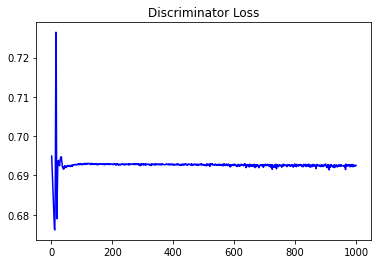

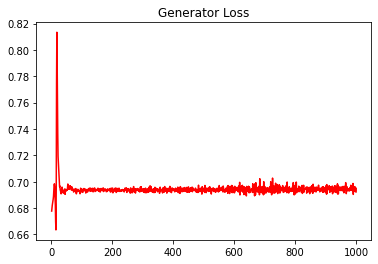

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.20242498669267517


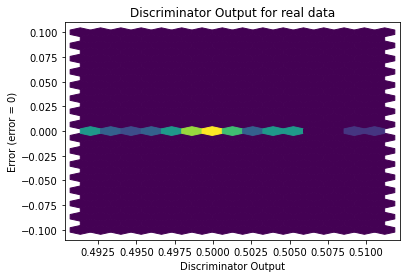

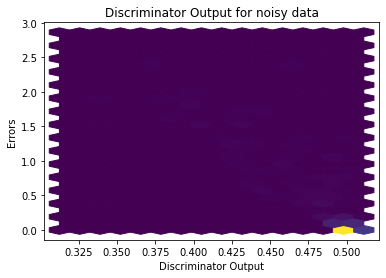

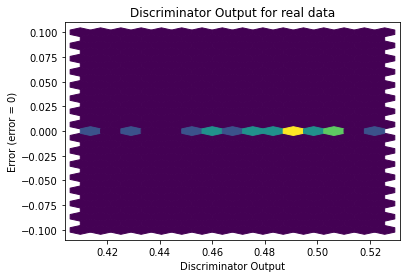

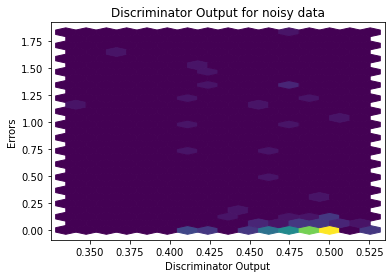

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


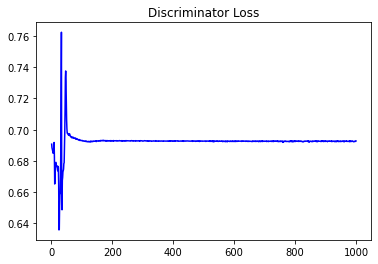

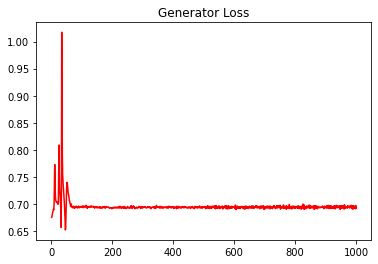

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1860723926768778


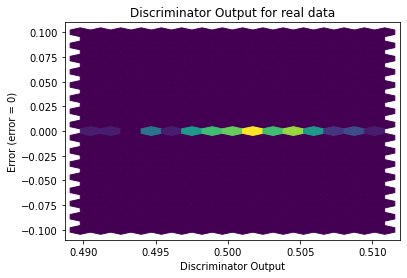

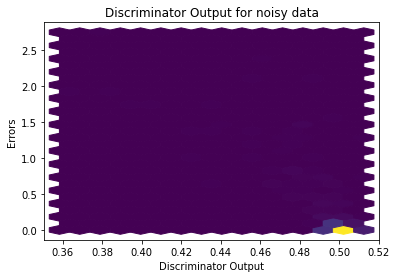

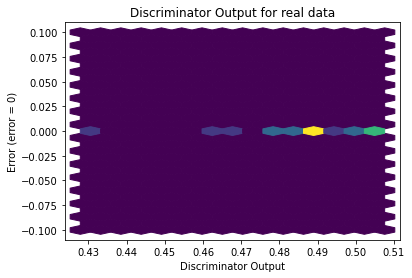

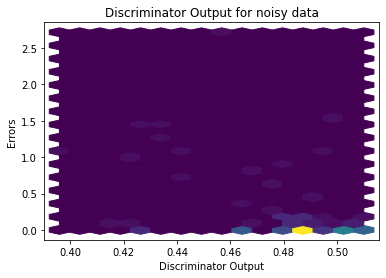

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7440]], requires_grad=True)
